# Building a Logistic Regression Model

---
Topics

*   1. Loading our Data
*   2. Encoding Variables
*   3. Fitting a Logistic Regression model
*   4. Validating our model

In [21]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

#1. Loading our Data


In [22]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#2. Encoding Variables

In [24]:
#Assigning X as input features and y as target variable

y = df['diagnosis']
X = df.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [25]:
# Split the dataset into 70% training and 30% testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

# 3. Fitting a Logistic Regression model

In [26]:
# Select model
model = LogisticRegression(max_iter=5000) #max_iter=5000 tells the algorithm to keep trying up to 5000 times
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [27]:
model.intercept_


array([-29.5754216])

In [28]:
model.coef_


array([[-0.90981805, -0.18594431,  0.24402858, -0.02468891,  0.14312991,
         0.1927918 ,  0.41547202,  0.22439816,  0.1759701 ,  0.03320957,
         0.0048194 , -1.19155032, -0.20208122,  0.12545286,  0.02428329,
        -0.05400143,  0.01489724,  0.02930236,  0.03092323, -0.01494273,
        -0.25755915,  0.44422964,  0.17881985,  0.01155521,  0.29404731,
         0.59263105,  1.05468156,  0.45535063,  0.53965235,  0.07607534]])

#B for Benign (non-cancerous)
#M for Malignant (cancerous)

In [29]:
y_pred = model.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [30]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.14, 1.  , 0.99, 0.06, 1.  , 0.01, 1.  , 0.  , 1.  , 0.  , 0.03,
       0.72, 0.02, 1.  , 0.01, 0.  , 0.71, 0.  , 1.  , 0.03, 0.25, 0.  ,
       0.01, 0.01, 0.  , 1.  , 0.  , 0.02, 1.  , 0.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.01, 0.  , 0.03, 0.82, 1.  , 0.99, 1.  , 1.  ,
       0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  ,
       0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.01, 1.  , 1.  , 0.74,
       1.  , 0.  , 1.  , 0.78, 0.  , 0.52, 0.02, 0.96, 0.  , 1.  , 0.06,
       0.  , 1.  , 1.  , 0.99, 0.31, 0.01, 1.  , 1.  , 1.  , 0.05, 0.  ,
       0.42, 0.  , 0.99, 0.  , 0.13, 0.  , 0.76, 0.  , 0.99, 0.  , 0.22,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.02, 1.  , 0.01,
       0.  , 0.  , 1.  , 0.02, 0.  , 0.  , 0.  , 1.  , 0.  , 0.03, 1.  ,
       0.05, 1.  , 0.  , 1.  , 0.8 , 0.03, 0.  , 0.  , 1.  , 1.  , 0.  ,
       0.99, 0.99, 1.  , 0.03, 0.  , 0.6 , 0.  , 1.  , 0.  , 1.  , 0.2 ,
       1.  , 0.  , 1.  , 0.  , 0.05, 0.57, 0.  , 1.

# 4. Validating our model

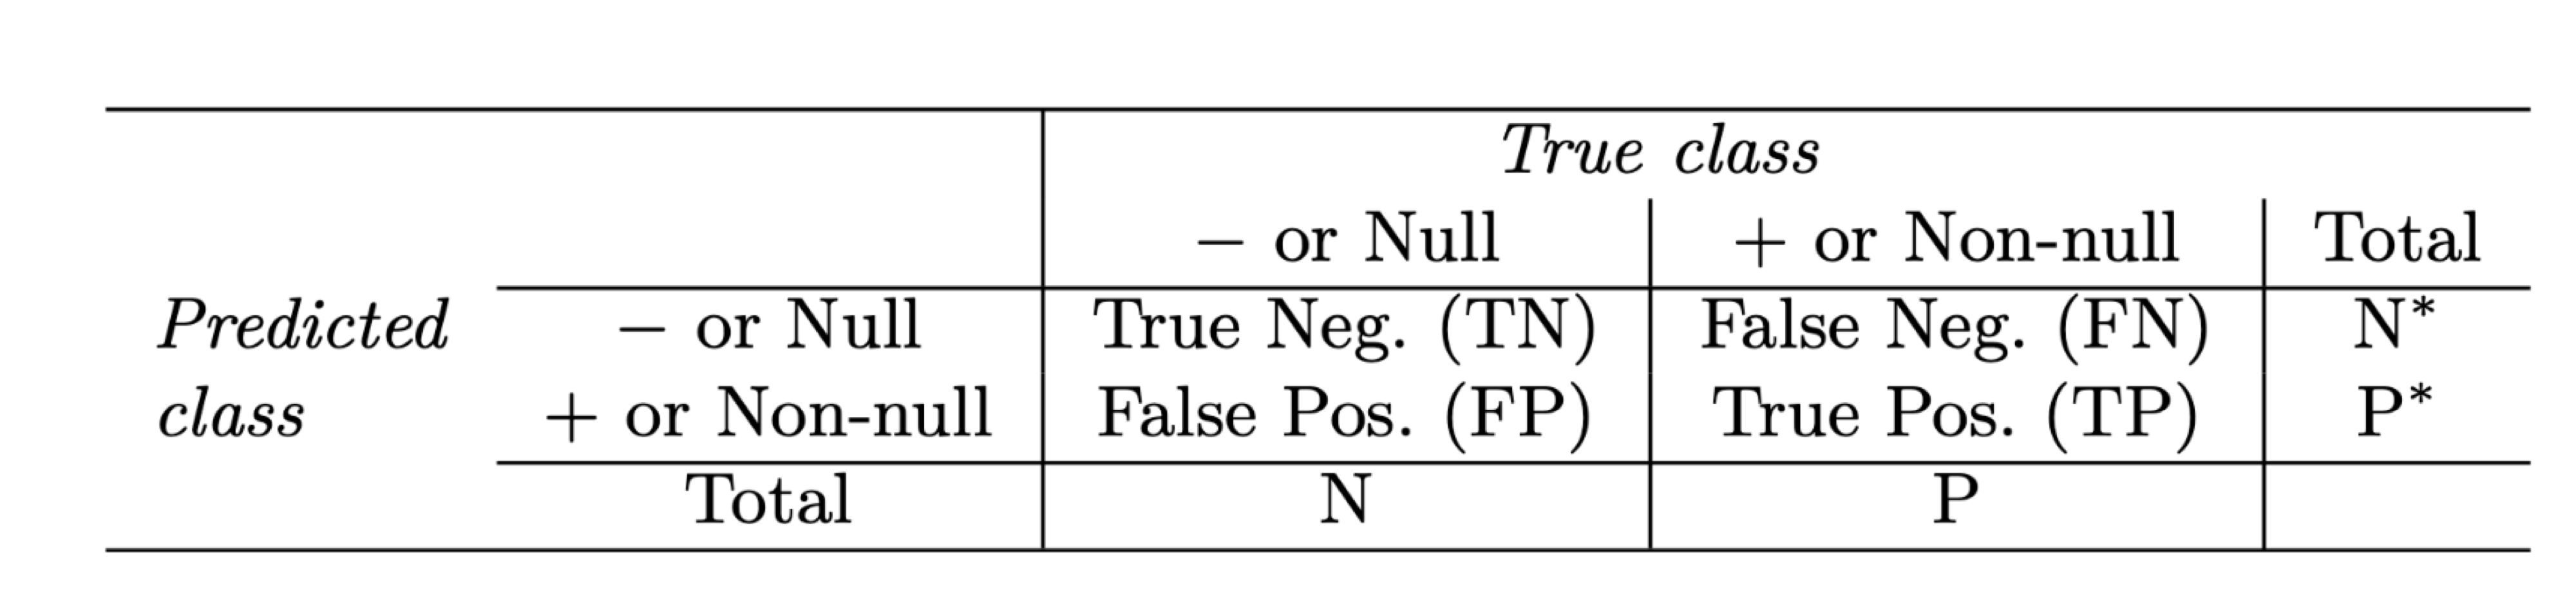

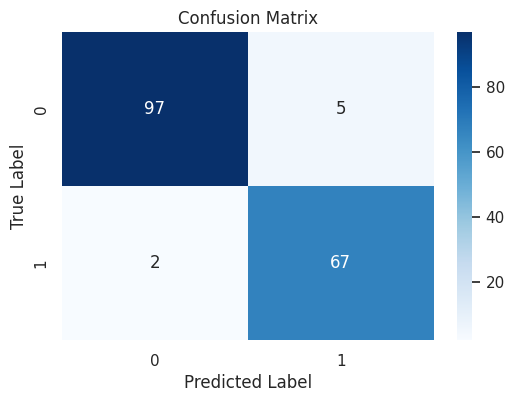

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

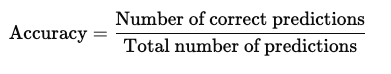

In [32]:
# Accuracy: The overall percentage of correct predictions made by the model across all classes.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.959064


In [33]:
# y_test and y_pred are initially in string form ('B', 'M')
mapping = {1: 'B', 0: 'M'}
y_test = [1 if label == 'B' else 0 for label in y_test]
y_pred = [1 if label == 'B' else 0 for label in y_pred]

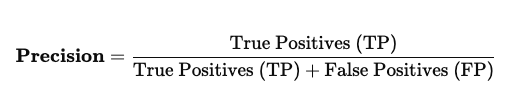

In [34]:
# Precision: Measures how many of the predicted positive cases were actually correct.
precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

Precision Score: 0.979798
In other words, when the model predicts someone survived, it is correct 0.979798 of the time.


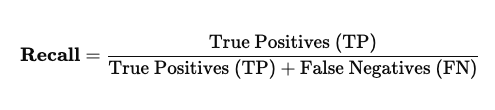

In [35]:
#Recall: Measures how many of the actual positive cases were correctly identified by the model.
recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.950980
In other words, it correctly identifies 0.950980 percent of all survivors


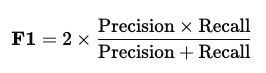

In [36]:
#F1 score is a single metric that combines precision and recall into one number.
f1_score(y_test, y_pred)

0.9651741293532339

In [37]:
# Print the classification report for evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.98      0.95      0.97       102

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Explanation of the output:

# Precision: Measures how many of the predicted positive cases were actually correct.

- For class "0" (Malignant), the model has a precision of 0.93, meaning that 93% of the predicted Malignant cases were correctly identified.
- For class "1" (Benign), the model has a precision of 0.98, meaning that 98% of the predicted Benign cases were correct.

# Recall: Measures how many of the actual positive cases were correctly identified by the model.

- For class "0" (Malignant), the model has a recall of 0.97, meaning that 97% of all the actual Malignant cases were correctly identified.
- For class "1" (Benign), the model has a recall of 0.95, meaning that 95% of all the actual Benign cases were correctly identified.

# F1-score: The harmonic mean of precision and recall. A balanced measure that gives us an overall idea of the model's performance.
 - The F1-score for Malignant (0) is 0.95, indicating a strong balance between precision and recall.
 - The F1-score for Benign (1) is 0.97, indicating an even stronger balance for this class.

# Support: The number of actual instances of each class in the test set.
   - Support for Malignant (0): 69 instances
  - Support for Benign (1): 102 instances

# Accuracy: The overall percentage of correct predictions made by the model across all classes.
- The accuracy is 0.96 (96%), meaning the model correctly predicted 96% of all test samples.

# Macro avg: The average performance of the model, treating all classes equally, regardless of their support.
- The macro average for precision, recall, and F1-score is 0.96, indicating the model performs consistently across both classes.

# Weighted avg: The average performance of the model, giving more weight to the classes with more samples (in this case, Benign).
 - The weighted average for precision, recall, and F1-score is also 0.96, showing that even with the class imbalance, the model performs well.